In [1]:
# Parameters
name = "2020-01-01-till-2021-02-28-tycho-brahe"
n_rows = None

# Exploratory data analysis (EDA) : trip statistics geographic heat map

# Purpose
Make a heat map of the trip statistics

# Methodology
* Load the statistics.
* Load the trips
* Generate a geographic heat map with mean trip power as color

# Setup

In [2]:
# %load ../imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
width=20
height=3
plt.rcParams["figure.figsize"] = (width,height)
sns.set(rc={'figure.figsize':(width,height)})

#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium
import plotly.express as px
import plotly.graph_objects as go

import sys
import os

import scipy.integrate
import seaborn as sns

import pyarrow as pa
import pyarrow.parquet as pq

import dask.dataframe

sys.path.append('../')
from src.visualization import visualize
import scipy.integrate

try:
    import trip_statistics
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/trip_statistics')
    import trip_statistics

try:
    import trip_id,prepare_dataset,trips
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/trip')
    import trip_id,prepare_dataset,trips

try:
    import clean_statistics
except:
    sys.path.append('../../../../src/models/pipelines/longterm/scripts/prepdata/clean_statistics')
    import clean_statistics

Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [3]:
df_stat = clean_statistics.load_output_as_pandas_dataframe('id_statistics_clean.parquet')
df_stat.head()

,latitude,longitude,heading,P1,P2,P3,P4,P,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,trip_direction,start_time,end_time,start_index,end_index
trip_no,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,56.037954,12.657033,66.737998,414.949513,445.467671,360.205492,355.449956,1576.072631,72.063481,-0.018140,0.014034,-0.211319,-0.166250,-0.672925,-0.675743,-0.809043,-0.803045,3.197520,4.410812,0.0,564.010629,0.0,Helsingør-Helsingborg,2020-01-01 08:31:19+00:00,2020-01-01 08:50:15+00:00,0,1128
1.0,56.034732,12.654767,259.289806,371.334951,398.771845,402.959547,384.335761,1557.402104,254.945688,0.091474,0.168342,0.084861,0.074851,0.777466,0.791547,0.676049,0.679201,0.851133,4.057768,1.0,617.560680,1.0,Helsingborg-Helsingør,2020-01-01 09:02:02+00:00,2020-01-01 09:22:52+00:00,1129,2364
2.0,56.037121,12.657407,66.003030,384.353535,403.802571,356.265381,348.166208,1492.587695,72.778990,0.006538,0.041393,-0.123441,-0.077197,-0.711043,-0.712979,-0.758449,-0.755415,2.035813,4.428171,2.0,544.000918,0.0,Helsingør-Helsingborg,2020-01-01 09:31:04+00:00,2020-01-01 09:49:13+00:00,2365,3453
3.0,56.035049,12.653717,260.582487,493.094571,522.021016,496.622592,468.592820,1980.330998,255.338827,0.021302,0.097969,0.098880,0.087748,0.720291,0.731599,0.716466,0.718973,4.789842,4.354430,3.0,570.503503,1.0,Helsingborg-Helsingør,2020-01-01 10:01:22+00:00,2020-01-01 10:20:25+00:00,3454,4595
4.0,56.037667,12.658731,66.705934,408.187609,436.029668,358.720768,348.050611,1550.988656,72.043185,0.009410,0.043116,-0.013878,0.039514,-0.657692,-0.658992,-0.696761,-0.695680,5.315009,4.270926,4.0,572.500000,0.0,Helsingør-Helsingborg,2020-01-01 10:31:47+00:00,2020-01-01 10:50:52+00:00,4596,5741


In [4]:
df_stat.describe()

,latitude,longitude,heading,P1,P2,P3,P4,P,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,start_index,end_index
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,56.036677,12.655724,162.058435,443.947296,472.853599,438.582001,422.783972,1778.166868,162.407938,-0.016282,0.035130,-0.012351,0.004597,0.025295,0.028317,-0.006106,-0.004092,1.813280,4.375498,89.051724,580.101269,0.494253,24600.091954,24610.764368
std,0.002089,0.001776,94.793876,50.302298,54.036129,92.273789,83.585477,249.441575,91.015332,0.074396,0.076039,0.091249,0.078463,0.723063,0.728066,0.738506,0.739685,1.644795,0.164489,52.580274,36.925500,0.501410,14692.870364,14661.424584
min,56.033508,12.651992,58.467020,267.536522,283.423478,252.809966,256.591216,1170.478885,68.426403,-0.245141,-0.168156,-0.259578,-0.202851,-0.811458,-0.813566,-0.819646,-0.819602,0.000000,3.995437,0.000000,491.000000,0.000000,0.000000,135.000000
25%,56.035061,12.654382,68.325861,413.658674,441.242174,367.887069,359.319203,1586.631730,72.977562,-0.057007,-0.015571,-0.065361,-0.047477,-0.684386,-0.685738,-0.740890,-0.740151,0.210301,4.271795,43.250000,551.125000,0.000000,11979.500000,11978.500000
50%,56.036705,12.655699,86.884585,450.078670,479.278744,435.978519,422.664389,1790.802337,74.542872,-0.019062,0.038382,0.001745,0.022643,-0.514111,-0.514464,-0.544182,-0.542018,1.451120,4.376579,88.500000,576.750000,0.000000,24626.000000,24625.000000
75%,56.037674,12.657292,257.123431,480.088000,510.311547,476.862359,460.076143,1921.402650,254.424113,0.036059,0.087052,0.054765,0.061028,0.755322,0.762517,0.736812,0.740183,2.948098,4.481692,134.750000,609.567623,1.000000,37102.750000,37101.750000
max,56.041687,12.659124,265.882645,593.932859,634.737538,734.320000,696.483200,2482.384000,258.055103,0.184416,0.251259,0.218043,0.210730,0.823065,0.827937,0.814539,0.819207,7.037406,4.930513,179.000000,687.589390,1.000000,49925.000000,49924.000000


In [5]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis

In [6]:
from dask.distributed import Client, progress, TimeoutError
client = Client(n_workers=8, threads_per_worker=1, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:57135 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 29.80 GiB


In [7]:
dataset_name='id'
file_path = f'{dataset_name}.parquet'
df = dask.dataframe.read_parquet(file_path)

In [8]:
df.persist()
cvs = ds.Canvas(plot_width = 2400, plot_height = 1200)
agg = cvs.points(df, 'longitude','latitude')

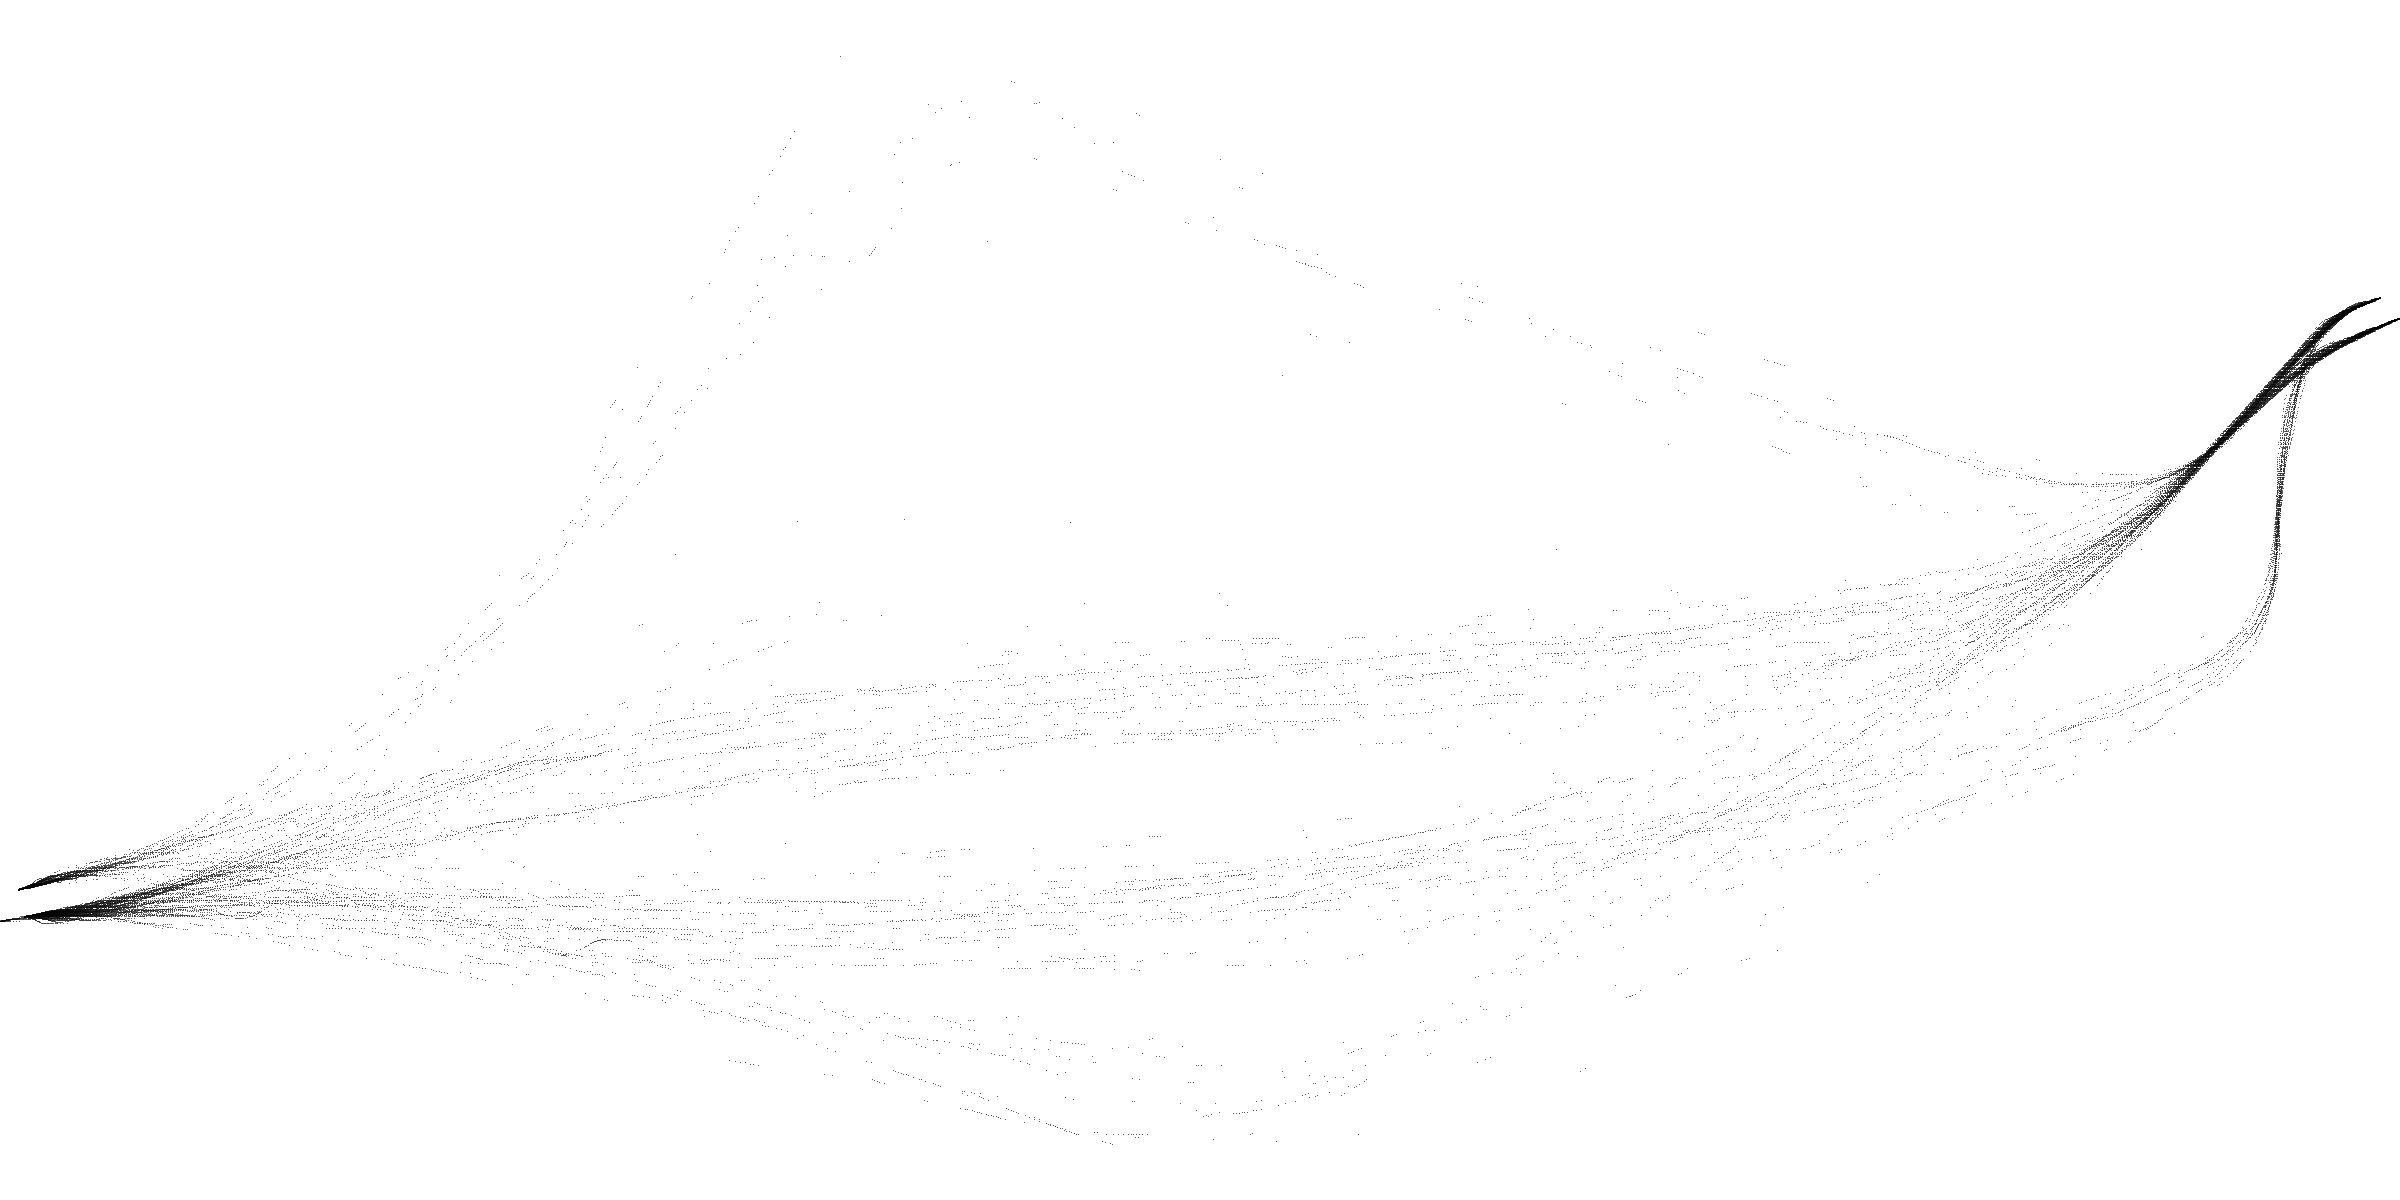

In [9]:
ds.transfer_functions.Image.border=0

tf.shade(agg, cmap = ["white", "black"])

In [10]:
client.close()